<a href="https://colab.research.google.com/github/JanLeyva/TFM/blob/main/HatefulMemev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


###  <font color='#A8EB15'> <b>  Interesting links </b>
- https://www.youtube.com/watch?v=igAF-48Pwnc&list=RDCMUCWXI5YeOsh03QvJ59PMaXFw&start_radio=1&rv=igAF-48Pwnc&t=475
- https://mmf.sh/docs/
- https://mmf.readthedocs.io/en/website/notes/hateful_memes_challenge.html
- https://github.com/facebookresearch/mmf/tree/main/projects/hateful_memes#prerequisites
- https://www.drivendata.co/blog/hateful-memes-benchmark/


## <font color='#A8EB15'> <b> Set up enviorament </b>

The `mmf` framework is more stable with python 3.7.11. For this reason we going to create conda enviorament with it.

In [ ]:
#@title enviorament creation
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.11.0-Linux-x86_64.sh 
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
!python --version # now returns Python 3.7.11 :: Anaconda, Inc.

Python 3.7.11


#### <font color='#A8EB15'> <b> GPU and Memory Check </b>

In [ ]:
# Checking GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 11 15:14:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Checking Memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


* Befor install mmf install specified versions of `torch` and `torchvision`

In [ ]:
#@title install torch and torchvision
# Install specified versions of `torch` and `torchvision`, before installing mmf (causes an issue)
!pip install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 552.8 MB 4.6 kB/s 
     |████████████████████████████████| 5.8 MB 2.1 MB/s 
     |████████████████████████████████| 829 kB 3.2 MB/s 
     |████████████████████████████████| 15.7 MB 69.8 MB/s 
     |████████████████████████████████| 4.3 MB 46.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=c571f2a1df4a6fa22ef31c7ed1918b376c472128ae309fe258ba897ef9b824fb
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


In [ ]:
import os
home = "/content"
os.chdir(home)
os.getcwd()
!ls

drive  Miniconda3-py37_4.11.0-Linux-x86_64.sh  sample_data


##  <font color='#A8EB15'> <b> MMF Configuration </b>

*  <font color='#FFC300'> Restart RUNTIME at the end

In [ ]:
# @title bash mmf commands
%%bash
mkdir mmf

# we gonna try with the mmf modify with the issues modify
cp -r drive/MyDrive/mmfv5.zip mmf

In [ ]:
import os
os.chdir(os.path.join(home, "mmf"))

In [ ]:
!unzip mmfv5.zip

Archive:  mmfv5.zip
   creating: docs/
  inflating: __MACOSX/._docs         
  inflating: docs/requirements.txt   
  inflating: __MACOSX/docs/._requirements.txt  
  inflating: docs/Makefile           
  inflating: __MACOSX/docs/._Makefile  
   creating: docs/source/
  inflating: __MACOSX/docs/._source  
  inflating: docs/.gitignore         
  inflating: __MACOSX/docs/._.gitignore  
  inflating: docs/license_header.txt  
  inflating: __MACOSX/docs/._license_header.txt  
  inflating: docs/source/index.rst   
  inflating: __MACOSX/docs/source/._index.rst  
   creating: docs/source/_templates/
  inflating: __MACOSX/docs/source/.__templates  
  inflating: docs/source/conf.py     
  inflating: __MACOSX/docs/source/._conf.py  
   creating: docs/source/_static/
  inflating: __MACOSX/docs/source/.__static  
   creating: docs/source/lib/
  inflating: __MACOSX/docs/source/._lib  
  inflating: docs/source/_templates/theme_variables.jinja  
  inflating: __MACOSX/docs/source/_templates/._theme_varia

In [ ]:
!ls mmf/projects/hateful_memes/configs/mmbt	  

defaults.yaml  with_features.yaml


In [ ]:
# change the dir to mmf
# os.chdir("mmf")
!pip install --editable .

Obtaining file:///content/mmf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/PyTorchLightning/pytorch-lightning (to revision 86b177ebe) to /tmp/pip-install-mc2a66_n/pytorch-lightning_e9f105ee1b424729b7150d222ecdc473
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-install-mc2a66_n/pytorch-lightning_e9f105ee1b424729b7150d222ecdc473
  Running command git checkout -q 86b177ebe
  Resolved https://github.com/PyTorchLightning/pytorch-lightning to commit 86b177ebe
  Running command git submodule update --init --recursive -q
  From https://github.com/PyTorchLightning/lightning-tutorials
   * branch            290fb466de1fcc2ac6025f74b56906592911e856 -> FETCH_HEAD
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 450 kB 4.0 MB/s 


##  <font color='#A8EB15'> <b> UnZip dataset

In [ ]:
import os
os.chdir("/content")

In [ ]:
%%bash
cp drive/MyDrive/datasetZIP/hateful_memesv3.zip "/content"
mmf_convert_hm --zip_file="hateful_memesv3.zip" --password="pass" --bypass_checksum 1

Data folder is /root/.cache/torch/mmf/data
Zip path is hateful_memesv3.zip
Copying hateful_memesv3.zip
Unzipping hateful_memesv3.zip
Extracting the zip can take time. Sit back and relax.
Moving train.jsonl


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/data/train.jsonl' -> '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/train.jsonl'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/mmf_convert_hm", line 33, in <module>
    sys.exit(load_entry_point('mmf', 'console_scripts', 'mmf_convert_hm')())
  File "/content/mmf/mmf_cli/hm_convert.py", line 206, in main
    converter.convert()
  File "/content/mmf/mmf_cli/hm_convert.py", line 153, in convert
    move(src, dest)
  File "/content/mmf/mmf/utils/download.py", line 422, in move
    shutil.move(path1, path2)
  File "/usr/local/lib/python3.7/shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "/usr/local/lib/python3.7/shut

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images    

dev_seen.jsonl	     img	  test_seen.jsonl
dev_unseen.jsonl     LICENSE.txt  test_unseen.jsonl
hateful_memesv3.zip  README.md	  train.jsonl


In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/ | wc -l

12140


In [ ]:
# Free up the disk by removing .zip, .tar files
!rm -rf /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memesv5.zip
!rm -rf $home/mmf/hateful_memesv5.zip

## <font color='#A8EB15'> <b> Visualize

In [ ]:
# !pip install --upgrade matplotlib

###  <font color='#A8EB15'> <b> Showing Some Memes

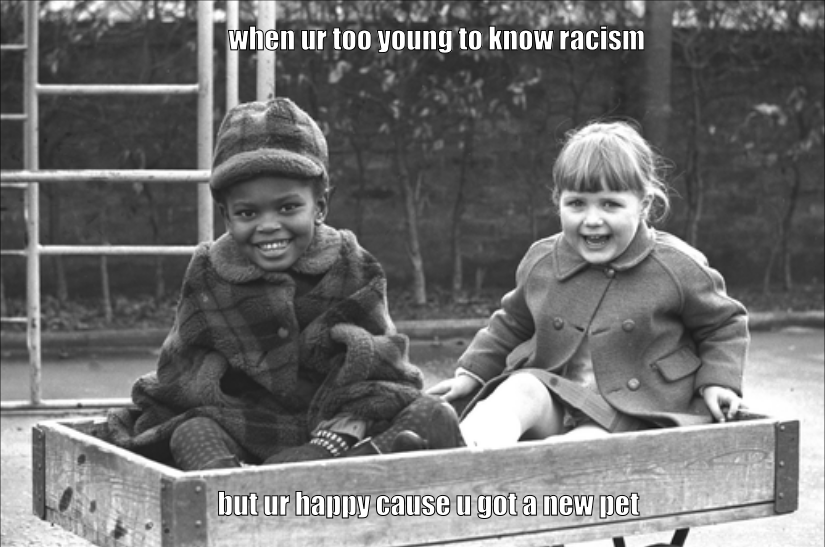

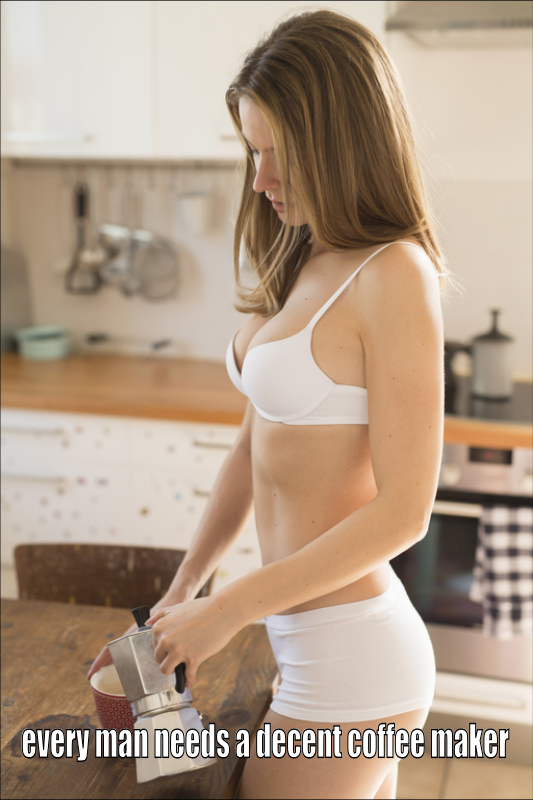

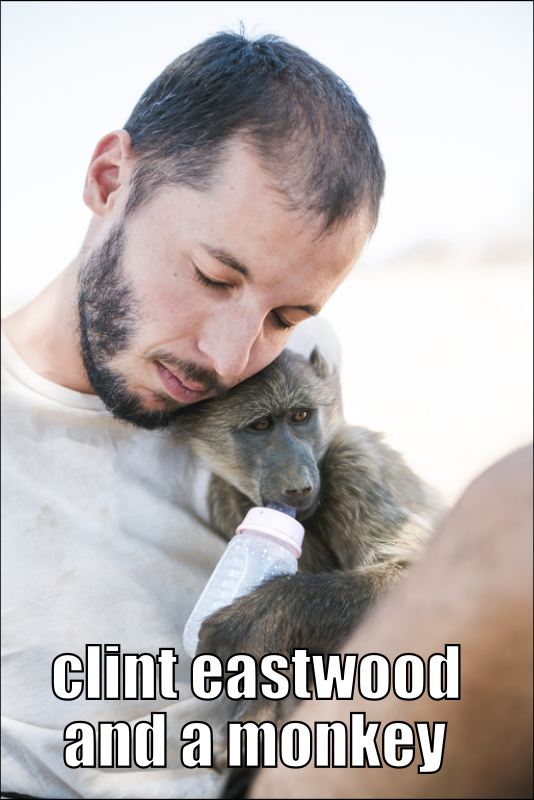

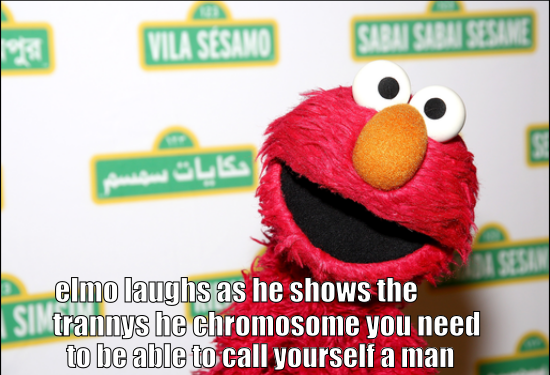

In [ ]:
import os
path = "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/"
imagesList=os.listdir(path)

from IPython.display import Image, display

for i in range(4):
    display(Image(filename=os.path.join(path, imagesList[i])))

* Errores:
  - https://github.com/omry/omegaconf/issues/572 
  - https://github.com/omry/omegaconf/issues/573



##  <font color='#A8EB15'> <b> Conf before Train </b>

In [ ]:
!pip install future

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/

annotations  images


* Creamos el directorio `annotations`
* pasamos todo el directorio `images` to `annotations`



In [ ]:
!mkdir /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

mkdir: cannot create directory ‘/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations’: File exists


In [ ]:
!cp  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/*  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

cp: -r not specified; omitting directory '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img'


In [ ]:
!mkdir /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img

In [ ]:
!cp  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/* /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/

dev_seen.jsonl	     img	  test_seen.jsonl
dev_unseen.jsonl     LICENSE.txt  test_unseen.jsonl
hateful_memesv3.zip  README.md	  train.jsonl


In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img | wc -l 

12140


In [ ]:
# !cp -R save/* drive/MyDrive/save_model2

In [ ]:
# we try to change the folder name

In [ ]:
# @title help function [ConfMatrix]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import metrics


def plotHeatMap(X, classes, title=None, fmt='.2g', ax=None, xlabel=None, ylabel=None):
    """ Fix heatmap plot from Seaborn with pyplot 3.1.0, 3.1.1
        https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
    """
    ax = sns.heatmap(X, xticklabels=classes, yticklabels=classes, annot=True, \
                     fmt=fmt, cmap=plt.cm.Blues, ax=ax) #notation: "annot" not "annote"
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
def plotConfusionMatrix(yTrue, yEst, classes, title=None, fmt='.2g', ax=None):
    plotHeatMap(metrics.confusion_matrix(yTrue, yEst), classes, title, fmt, ax, xlabel='Estimations', \
                ylabel='True values'); 

## <font color='#A8EB15'> <b> Training mmbt model </b>


In [ ]:
!mmf_run config=projects/hateful_memes/configs/mmbt/defaults.yaml \
  model=mmbt \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/mmbt/defaults.yaml
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option model to mmbt
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-08T19:43:01 | mmf: Logging to: ./save/train.log
2022-03-08T19:43:01 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/mmbt/defaults.yaml', 'model=mmbt', 'dataset=hateful_memes', 'training.log_interval=50', 'training.max_updates=3000', 'training.batch_size=16'

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/mmbt/defaults.yaml \
    model=mmbt \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/current.ckpt

2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/mmbt/defaults.yaml
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option model to mmbt
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option run_type to test
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/current.ckpt
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-08T22:55:09 | mmf: Logging to: ./save/train.log
2022-03-08T22:55:09 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/mmbt/defaults.yaml', 'model=mmbt', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/current.ckpt', 'evaluation.predict=true'])
2022-03-08T22:55:09 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-08T22:55:09 | mmf.

### <font color='#A8EB15'> <b> Calculate metric AUROC </b>

In [ ]:
import pandas as pd

In [ ]:
!ls save/hateful_memes_mmbt_32673386//reports

hateful_memes_run_test_2022-03-08T21:57:09.csv


In [ ]:
pred = pd.read_csv("/content/save/hateful_memes_mmbt_9581149/reports/hateful_memes_run_test_2022-03-08T22:56:49.csv")

In [ ]:
pred

,id,proba,label
0,15740,0.016283,0
1,38794,0.971995,1
2,60792,0.014153,0
3,71824,0.001951,0
4,4796,0.740180,1
...,...,...,...
1995,71352,0.276205,0
1996,2164,0.005020,0
1997,3587,0.044384,0
1998,47839,0.056663,0


In [ ]:
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

In [ ]:
test

,id,img,label,text
0,15740,img/15740.png,1,when someone tells you how to bbq
1,38794,img/38794.png,1,when they say white folks don't know how to cook
2,60792,img/60792.png,1,the original derp-face
3,71824,img/71824.png,1,okay here you go! you piece of shit!
4,4796,img/04796.png,1,xboxone farming 1619 simulator
...,...,...,...,...
1995,71352,img/71352.png,0,fighting for gay rights
1996,2164,img/02164.png,0,that feeling when you finish your homework in ...
1997,3587,img/03587.png,0,the day that shook new york city
1998,47839,img/47839.png,0,one of the first prototypes of the atom bomb


In [ ]:
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])

In [ ]:
sum(pred['label'] == 1)

561

In [ ]:
ConfMatrix

array([[1005,  245],
       [ 434,  316]])

In [ ]:
ConfMatrix[1][1]

316

Accuracy: 0.6605


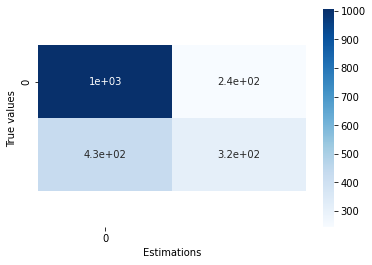

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/

dev_seen.jsonl	  img	       README.md	test_unseen.jsonl
dev_unseen.jsonl  LICENSE.txt  test_seen.jsonl	train.jsonl


# <font color='#A8EB15'> <b> VisualBERT </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/visual_bert/direct.yaml \
  model=visual_bert \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

2022-03-10T14:37:11 | matplotlib.font_manager: Generating new fontManager, this may take some time...
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/direct.yaml
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-10T14:37:11 | mmf: Logging to: ./save/train.log
2022-03-10T14:37:11 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/direct.yaml', '

In [ ]:
!mmf_run config=projects/visual_bert/configs/hateful_memes/from_coco.yaml \
    model=visual_bert \
    dataset=hateful_memes \
    run_type=train_val

2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option config to projects/visual_bert/configs/hateful_memes/from_coco.yaml
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option run_type to train_val
2022-03-10T16:01:21 | mmf: Logging to: ./save/train.log
2022-03-10T16:01:21 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/visual_bert/configs/hateful_memes/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=train_val'])
2022-03-10T16:01:21 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-10T16:01:21 | mmf.utils.general: CUDA Device 0 is: Tesla T4
2022-03-10T16:01:21 | mmf_cli.run: Using seed 21300645
2022-03-10T16:01:21 | mmf.trainers.mmf_trainer: Loading datasets
loading configuration file https://huggingface.co/bert-base-uncased/re

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/visual_bert//direct.yaml \
    model=visual_bert \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/best.ckpt

2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert//direct.yaml
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option run_type to test
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-10T15:53:08 | mmf: Logging to: ./save/train.log
2022-03-10T15:53:08 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert//direct.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-10T15:53:08 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-0

* Copy the model to Drive

In [ ]:
!ls drive/MyDrive/

'Colab Notebooks'	    mmfv3.zip	    'saveVisualBERT (1)'
 CV_Jan_Leyva.pdf	    mmfv5.zip	     SL_Test
 datasetZIP		    Pythonfiles      STATICAL_LEARNING
'EIO - UPC'		    save_model	     TFMdataset
 Final_Assignment_MVA.zip   save_model2
'MESIO - UPC'		    saveVisualBERT


In [ ]:
!cp -r save drive/MyDrive/saveVisualBERT

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_visual_bert_8294730/reports/hateful_memes_run_test_2022-03-10T15:54:05.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

Accuracy: 0.688


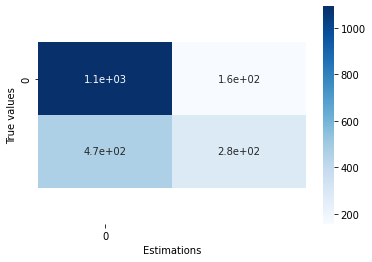

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
!cp /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl drive/MyDrive

#<font color='#A8EB15'> <b> VilBERT </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/vilbert/defaults.yaml \
  model=vilbert \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/vilbert/defaults.yaml
2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option model to vilbert
2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-11T15:26:02 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-11T15:26:02 | mmf: Logging to: ./save/train.log
2022-03-11T15:26:02 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/vilbert/defaults.yaml', 'model=vilbert', 'dataset=hateful_memes', 'training.log_interval=50', 'training.max_updates=3000', 'training.ba

* <font color='#A8EB15'> Validation set

In [ ]:
!mmf_run config=projects/hateful_memes/configs/vilbert/defaults.yaml \
    model=vilbert \
    dataset=hateful_memes \
    run_type=train_val

2022-03-11T16:16:01 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/vilbert/defaults.yaml
2022-03-11T16:16:01 | mmf.utils.configuration: Overriding option model to vilbert
2022-03-11T16:16:01 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-11T16:16:01 | mmf.utils.configuration: Overriding option run_type to train_val
2022-03-11T16:16:01 | mmf: Logging to: ./save/train.log
2022-03-11T16:16:01 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/vilbert/defaults.yaml', 'model=vilbert', 'dataset=hateful_memes', 'run_type=train_val'])
2022-03-11T16:16:01 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-11T16:16:01 | mmf.utils.general: CUDA Device 0 is: Tesla P100-PCIE-16GB
2022-03-11T16:16:01 | mmf_cli.run: Using seed 1707128
2022-03-11T16:16:01 | mmf.trainers.mmf_trainer: Loading datasets
loading configuration file https://huggingface.co/bert-base-uncased/resolve/m

* <font color='#A8EB15'> Predictions in test set

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/vilbert/defaults.yaml \
    model=vilbert \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/best.ckpt

2022-03-11T16:59:48 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/vilbert/defaults.yaml
2022-03-11T16:59:48 | mmf.utils.configuration: Overriding option model to vilbert
2022-03-11T16:59:48 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-11T16:59:48 | mmf.utils.configuration: Overriding option run_type to test
2022-03-11T16:59:48 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-11T16:59:48 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-11T16:59:48 | mmf: Logging to: ./save/train.log
2022-03-11T16:59:48 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/vilbert/defaults.yaml', 'model=vilbert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-11T16:59:48 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-11T16:59:48 

* <font color='#A8EB15'> Confusion Matrix

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_vilbert_48408345/reports/hateful_memes_run_test_2022-03-11T17:00:38.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

Accuracy: 0.686


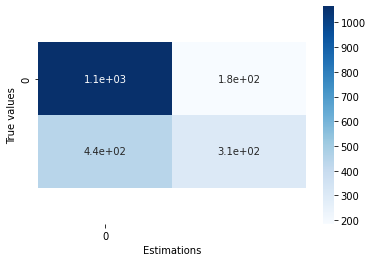

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test['label'], pred['proba'],  pos_label=1)
metrics.auc(fpr, tpr)

0.7228373333333333

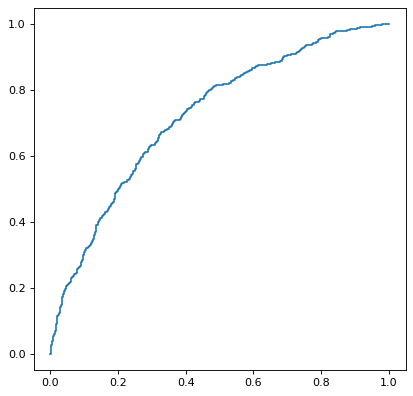

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(6, 6), dpi=80)
plt.plot(fpr, tpr)

* save the model

In [ ]:
!ls

drive		     Miniconda3-py37_4.11.0-Linux-x86_64.sh  sample_data
hateful_memesv3.zip  mmf				     save


In [ ]:
!mkdir drive/MyDrive/ViLbert

In [ ]:
!cp -r save/* drive/MyDrive/ViLbert